In [271]:
import numpy as np
np.set_printoptions(precision=6)
import sys
import matplotlib.pyplot as plt


In [272]:
EPS = 0.01
interval = (1, 1.5)
def f(x):
    return x * x * x + x * x - 2 * x - 1

def df(x):
    return 3 * x * x + 2 * x - 2

In [273]:
def phi(x):
    return (x**3 + x**2 - 1) / 2

def dphi(x):
    return (3*x**2 + 2*x) / 2

In [291]:
def select_lambda():
    x = np.linspace(interval[0], interval[1], 100)
    y = [df(i) for i in x]
    sign_df = None
    if all([np.sign(i) == -1 for i in y]):
        sign_df = -1
    elif all([np.sign(i) == 1 for i in y]):
        sign_df = 1
    else:
        print('Error: Derivative change sign\n')
        return
    y = [abs(df(i)) for i in x]
    return sign_df / max(y)

def phi(x):
    lmbd = select_lambda()
    return x - lmbd * f(x)

def dphi(x):
    lmbd = select_lambda()
    return 1 - lmbd * df(x)

In [294]:
def newton_method():
    x = interval[1]
    points = [x]
    while True:
        x_next = x - f(x)/df(x)
        if abs(x_next - x) < EPS:
            return x_next, points
        else:
            points.append(x_next)
            x = x_next

In [295]:
newton_method()

(1.2469820297515721, [1.5, 1.2903225806451613, 1.2486062445062553])

In [296]:
res, points = newton_method()

def draw_graphic(points):
    x = np.linspace(0, 2, 1000)
    def f1(x):
        return x*x*x
    y = [f1(i) for i in x]
    plt.plot(x, y)

    def f2(x):
        return 2*x - x*x + 1
    y = [f2(i) for i in x]

    plt.plot(x, y)
    plt.xlabel('X')
    plt.ylabel('Y')
    for i in points:
        plt.plot(i, f1(i), 'or')
        plt.plot(i, f2(i), 'or')    
    plt.grid(True)
    plt.legend(['y = x^3', 'y = 2x - x^2 + 1'], loc='upper left')
    plt.grid(True)
    plt.savefig('Interval_definition')
    plt.show()

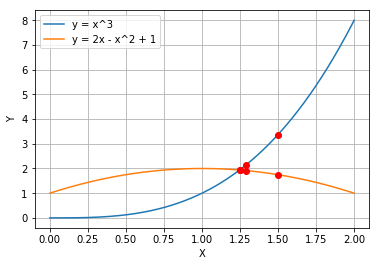

In [297]:
draw_graphic(points)

In [279]:
def get_q():
    return max(abs(dphi(interval[0])), abs(dphi(interval[1])))

In [282]:
def iteration_method():
    x = (interval[1] + interval[0]) /  2
    q = get_q()
    points = [x]
    while True:
        x_next = phi(x)
        if q * abs(x_next - x) / (1 - q) < EPS:
            return x_next, points
        points.append(x_next)
        x = x_next
    

In [283]:
iteration_method()

(1.2578125, [1.25])

In [284]:
def newton_method():
    x = interval[1]
    while True:
        x_next = x - f(x)/df(x)
        if abs(x_next - x) < EPS:
            return x_next
        else:
            x = x_next

In [292]:
def iteration_method():
    x = (interval[1] + interval[0]) /  2
    q = get_q()
    while True:
        x_next = phi(x)
        if q * abs(x_next - x) / (1 - q) < EPS:
            return x_next
        x = x_next
print("Newton method: ", newton_method())    
print("Iteration_method: ", iteration_method())

Newton method:  1.2469820297515721
Iteration_method:  1.247983870967742
